In [15]:
import numpy as np
import matplotlib.pyplot as plt

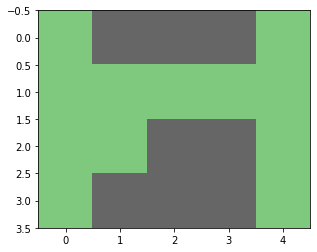

In [127]:
maze_list = [[0, 1, 1, 1, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 1, 1, 0], 
             [0, 1, 1, 1, 0]]
maze_arr = np.array(maze_list)
plt.imshow(maze_arr, cmap = 'Accent')

In [128]:
def func(maze_arr):
    graph_dict = {}
    near_coords = []
    x, y = 0, 0
    for row in maze_arr:
        for column in row:
            if maze_arr[y, x] != 1:
                if y != 0 and maze_arr[y-1, x] != 1:
                    near_coords.append((x, y-1))

                if y != len(maze_arr)-1 and maze_arr[y+1, x] != 1:
                    near_coords.append((x, y+1))

                if x != 0 and maze_arr[y, x-1] != 1:
                    near_coords.append((x-1, y))

                if x != len(maze_arr[0])-1 and maze_arr[y, x+1] != 1: 
                    near_coords.append((x+1, y))

                graph_dict[(x, y)] = near_coords

                near_coords = []
            x += 1
        y += 1
        x = 0
    
    
    return graph_dict

In [129]:
func(maze_arr)

{(0, 0): [(0, 1)],
 (4, 0): [(4, 1)],
 (0, 1): [(0, 0), (0, 2), (1, 1)],
 (1, 1): [(1, 2), (0, 1), (2, 1)],
 (2, 1): [(1, 1), (3, 1)],
 (3, 1): [(2, 1), (4, 1)],
 (4, 1): [(4, 0), (4, 2), (3, 1)],
 (0, 2): [(0, 1), (0, 3), (1, 2)],
 (1, 2): [(1, 1), (0, 2)],
 (4, 2): [(4, 1), (4, 3)],
 (0, 3): [(0, 2)],
 (4, 3): [(4, 2)]}

In [132]:
def min_distance(graph_dict):
    current_nodes = [(0, 0)]
    next_nodes = []
    path = []
    while (4, 3) not in current_nodes:
        for node in current_nodes:
            path.append(node)
            for next_node in graph_dict[node]:
                if next_node not in path:
                    next_nodes.append(next_node)
            current_nodes = next_nodes
            next_nodes = []
    return path

In [131]:
min_distance(func(maze_arr))


[(0, 0),
 (0, 1),
 (0, 2),
 (1, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 0),
 (4, 2)]

In [111]:
d = min_distance(func(maze_arr))
row = 0
column = 0
while row < len(maze_arr):
    while column < len(maze_arr[row]):
        if (column, row) in d:
            maze_arr[row, column] = 2 
        column += 1
    column = 0
    row += 1

(0, 0)
(0, 1)
(0, 2)
(1, 1)
(2, 1)
(2, 0)
(2, 2)
(3, 1)
(3, 0)
(4, 1)
(4, 0)
(4, 2)


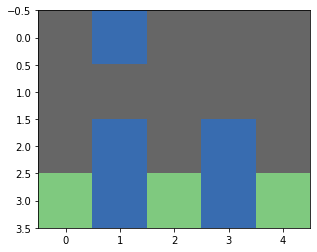

In [113]:
plt.imshow(maze_arr, cmap = 'Accent')